# Week 8 - What Now?

Now we have verifiied that our land ice data is good we want to start making plots of results with it. For now let's ignore the unit problems and sort that out later.

In [1]:
from modules import week8 as w8
from modules import week5 as w5
from modules import misc
import xarray as xr

%load_ext autoreload
%autoreload 2

In [2]:
SIC, LIC = w8.load_ice_data()
SIC = SIC.sel(time=slice('1979-01-01','2019-12-31')).compute()
LIC = LIC.sel(time=slice('1979-01-01','2019-12-31')).compute()
temperature = w8.load_temp_data().sel(time=slice('1979-01-01','2019-12-31')).compute()

100%|██████████| 189/189 [00:06<00:00, 30.61it/s]


In [3]:

landmask = w8.load_landmask()
landmask = landmask >= .5
landmask

<xarray.DataArray (y: 332, x: 316)>
array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])
Coordinates:
  * y        (y) int32 4350000 4325000 4300000 ... -3875000 -3900000 -3925000
  * x        (x) int32 -3950000 -3925000 -3900000 ... 3875000 3900000 3925000

In [4]:
SIC

<xarray.DataArray 'sic' (time: 492, y: 332, x: 316)>
array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
...
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]])
Coordinates:
  * time     (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2019-12-01
  * y        (y) int32 4350000 4325000 4300000 ... -3875000 -3900000 -3925000
  * x        (x) int32 -3950000 -3925000 -3900000 ... 3875000 3900000 3925000

In [5]:
LIC

<xarray.DataArray 'lic' (time: 180, y: 332, x: 316)>
array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
...
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]])
Coordinates:
  * time     (time) datetime64[ns] 2002-04-17T12:00:00 ... 2019-12-16T12:00:00
  * y        (y) int32 4350000 4325000 4300000 ... -3875000 -3900000 -3925000
  * x        (x) int32 -3950000 -3925000 -3900000 ... 3875000 3900000 3925000

In [6]:
temperature

<xarray.Dataset>
Dimensions:  (time: 492, x: 316, y: 332)
Coordinates:
  * time     (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2019-12-01
  * y        (y) int32 4350000 4325000 4300000 ... -3875000 -3900000 -3925000
  * x        (x) int32 -3950000 -3925000 -3900000 ... 3875000 3900000 3925000
Data variables:
    sst      (time, y, x) float64 0.0 0.0 0.0 0.0 ... 285.4 285.4 285.5 285.5
    t2m      (time, y, x) float64 0.0 0.0 0.0 0.0 ... 285.2 285.3 285.3 285.4
    skt      (time, y, x) float64 0.0 0.0 0.0 0.0 ... 285.3 285.4 285.4 285.4

## All time plots

Because the land ice data starts in 2002, we will start by making our plots only looking at sea ice.

In [7]:
SIC = (
    SIC
      .pipe(w5.yearly_average)
      # .pipe(w5.find_anomalies)
                )
LIC = (
    LIC
      .pipe(w5.yearly_average)
      # .pipe(w5.find_anomalies)
                )
temperature = (
    temperature
      .pipe(w5.yearly_average)
      # .pipe(w5.find_anomalies)
                )
SIC_anomalous = (
    SIC
      .pipe(w5.find_anomalies)
                )
LIC_anomalous = (
    LIC
      .pipe(w5.find_anomalies)
                )
temperature_anomalous = (
    temperature
      .pipe(w5.find_anomalies)
                )

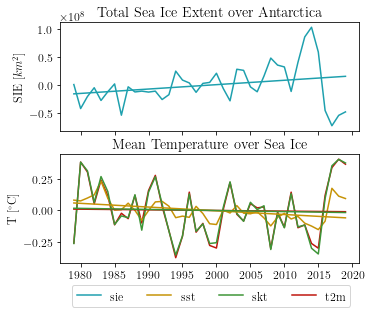

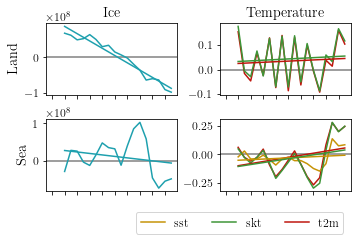

In [24]:
w8.plot_2_timeseries(SIC_anomalous.copy(), temperature_anomalous.copy(), landmask.copy())
w8.plot_6_timeseries(SIC_anomalous.copy(), LIC_anomalous.copy(), temperature_anomalous.copy(), landmask.copy())

In [9]:
# w8.plot_2_trends(SIC_anomalous.copy(), LIC_anomalous.copy(), temperature_anomalous.copy(), landmask.copy())
# w8.plot_6_trends(SIC_anomalous.copy(), LIC_anomalous.copy(), temperature_anomalous.copy(), landmask.copy())

## Scatter Plots

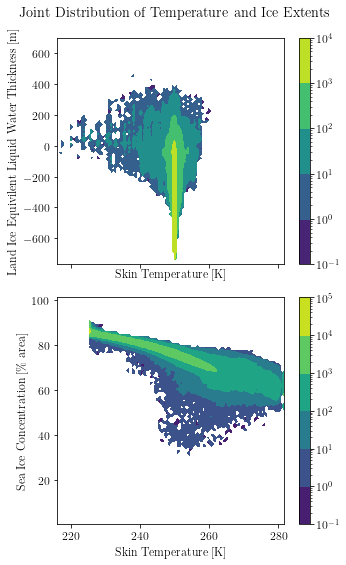

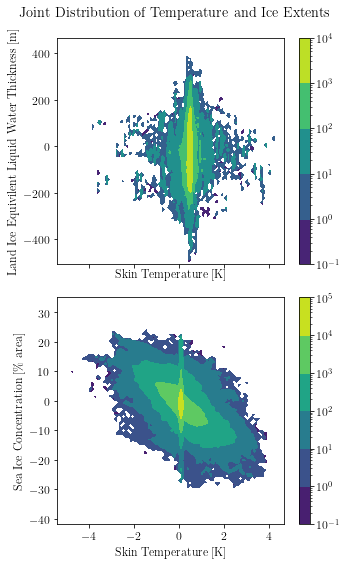

In [10]:
w8.plot_2_scatter(SIC.copy(), LIC.copy(), temperature.copy(), landmask.copy())
w8.plot_2_scatter(SIC_anomalous.copy(), LIC_anomalous.copy(), temperature_anomalous.copy(), landmask.copy(), filename='distribution_of_temperature_ice_anomalous')

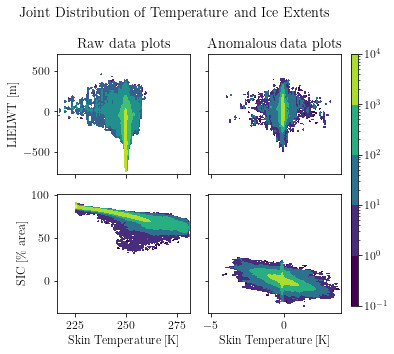

In [11]:
w8.plot_4_scatter(SIC.copy(), LIC.copy(), temperature.copy(), landmask.copy())

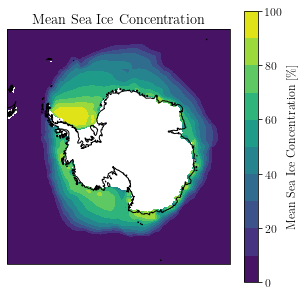

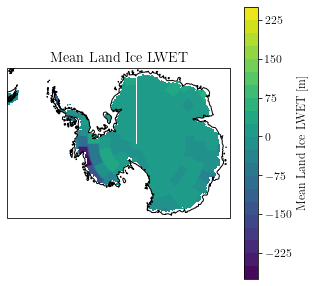

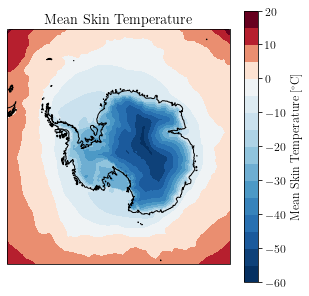

In [12]:
w8.mean_distribution(SIC, LIC, temperature, landmask)

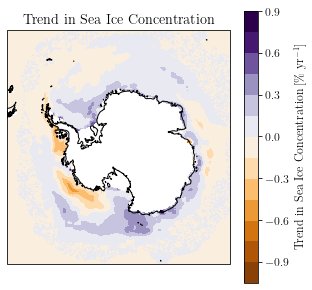

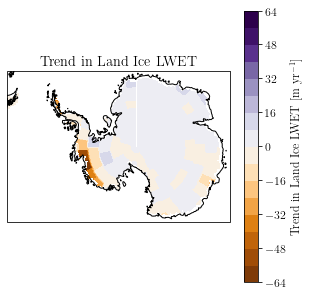

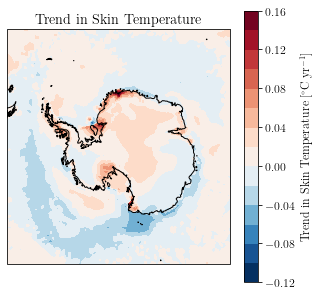

In [13]:
w8.trend_distribution(SIC, LIC, temperature, landmask)

In [15]:
misc.notify('Your code has finished running')